## Building ANN for Classification - Diabetes Prediction

<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Doctor_Checkup_Cartoon.svg"
alt="Fashion MNIST sprite"  length = "1500" width="1500">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Diabetes Classification Using ANNs
  </td></tr>
</table>


---
- This dataset is used to predict whether or not a patient has diabetes, based on given features/diagnostic measurements. 
- Only female patients are considered with at least 21 years old of Pima Indian heritage.

- Inputs:
    - Pregnancies: Number of times pregnant
    - GlucosePlasma: glucose concentration a 2 hours in an oral glucose tolerance test
    - BloodPressure: Diastolic blood pressure (mm Hg)
    - Skin: ThicknessTriceps skin fold thickness (mm)
    - Insulin: 2-Hour serum insulin (mu U/ml)
    - BMI: Body mass index (weight in kg/(height in m)^2)
    - DiabetesPedigreeFunction: Diabetes pedigree function
    - Age: Age (years)
- Outputs:
    - Diabetes or no diabetes (0 or 1) 
    
- Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

---

In [131]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf

In [132]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

### Load the dataset

In [133]:
diabetes = pd.read_csv("./resources/diabetes.csv")

# Check the data load
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [134]:
# Check for missing values

diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [135]:
# Check for data structure

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [136]:
# Check for summary statistics

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Outcome variable')

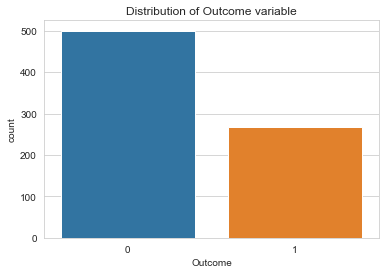

In [137]:
# View the response variable
sns.countplot(x='Outcome', data=diabetes)
plt.title("Distribution of Outcome variable")

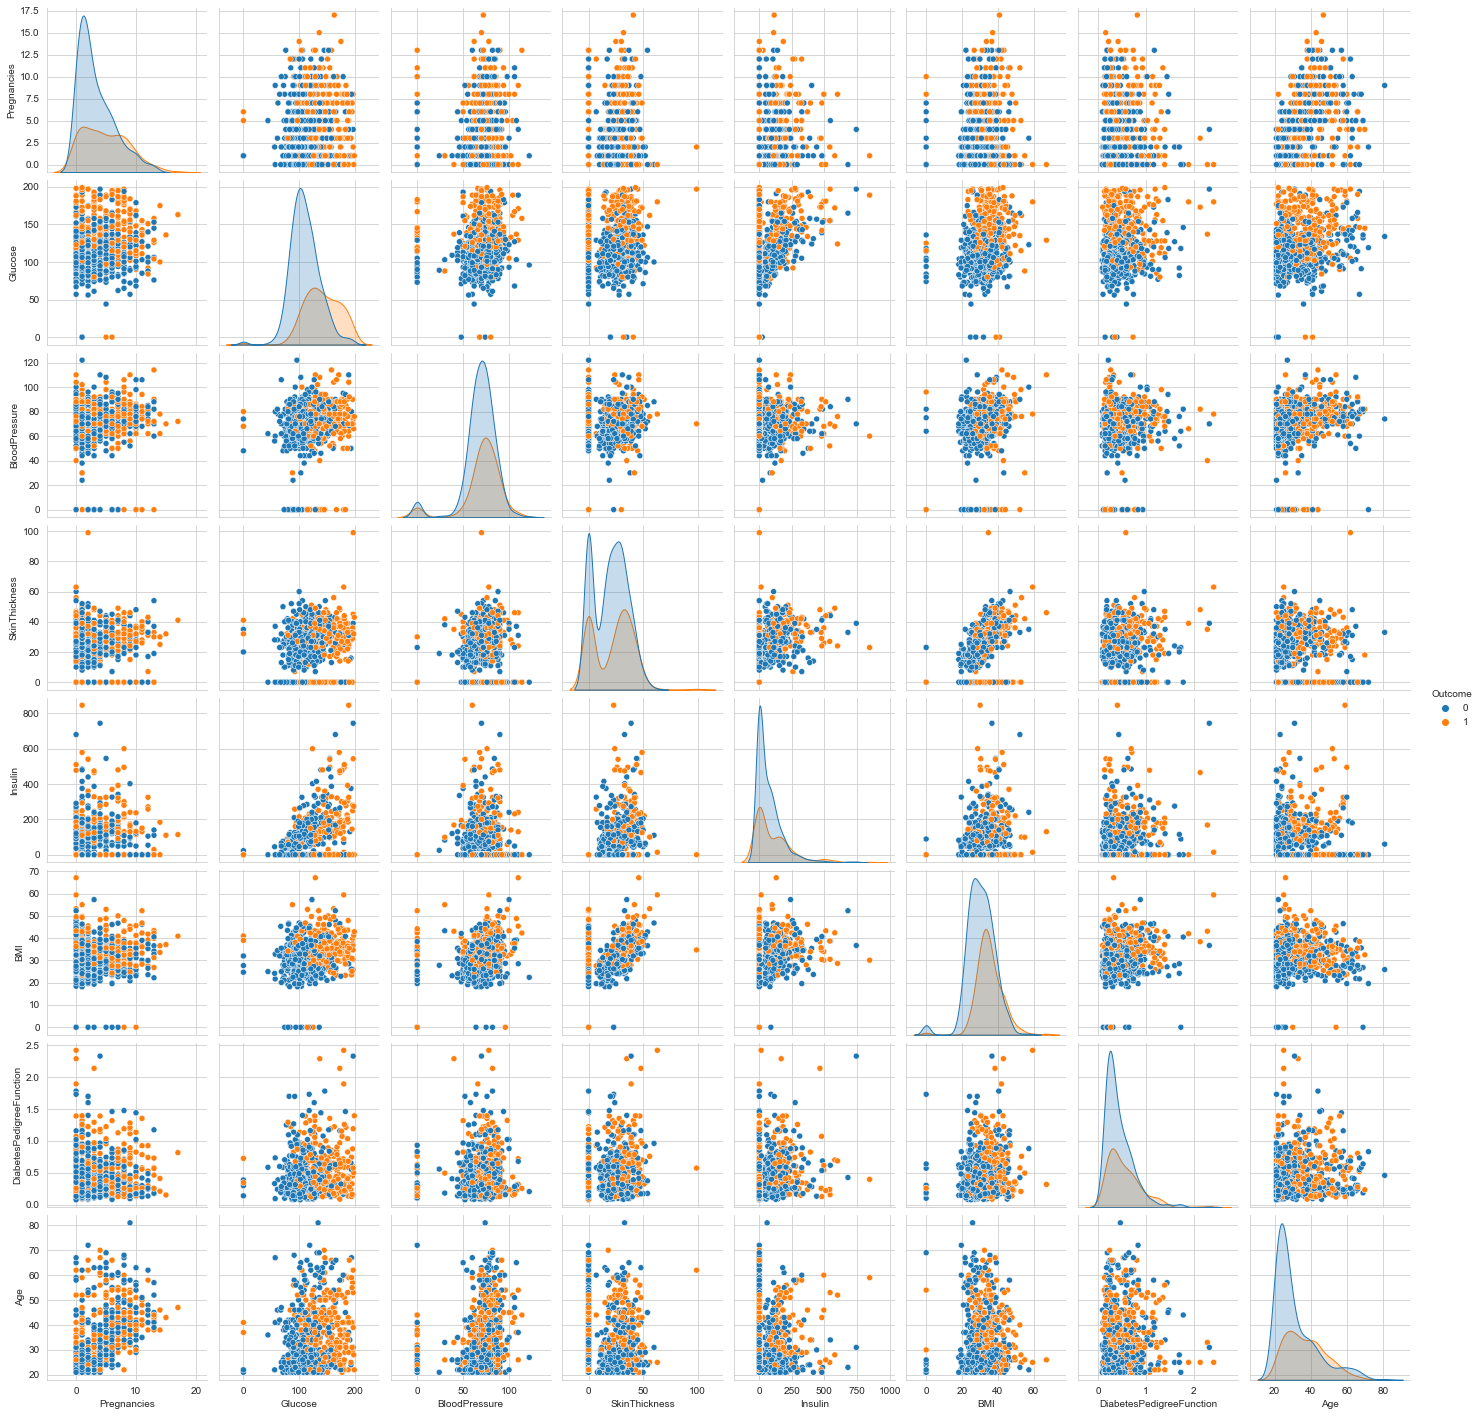

In [138]:
# We will run a pair plot across entire dataset by the target variable
sns.pairplot(data=diabetes, hue='Outcome')

<AxesSubplot:>

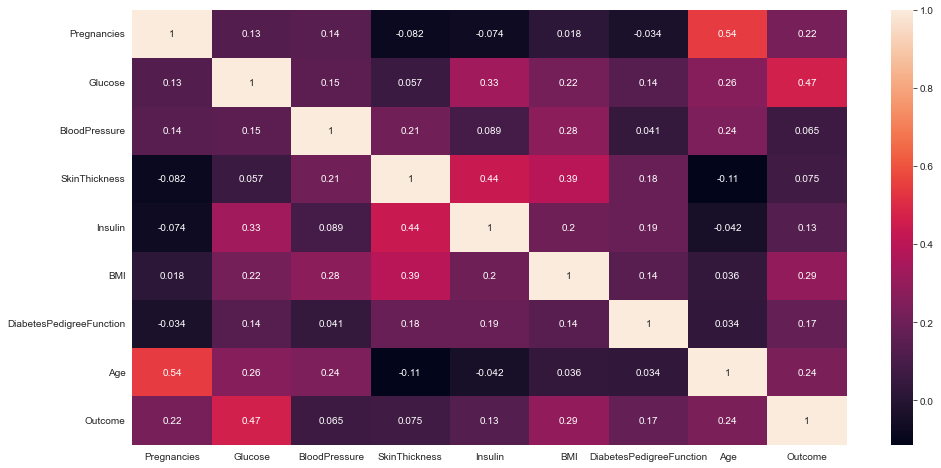

In [139]:
# Let us build a heatmap on correlation
plt.figure(figsize=(16, 8))
sns.heatmap(diabetes.corr(), annot=True)

### Data Preparation

In [140]:
# Extract the feature and target variable

X = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, -1:].values

In [141]:
# Check the shape of feature array

X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [142]:
# Check the shape of the feature
X.shape

(768, 8)

In [143]:
# Check the target variable shape
y.shape

(768, 1)

In [144]:
# Now we will perform data normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Check the standardised features now
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Perform train, test split

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [146]:
# Check the shape of X_train
X_train.shape

(614, 8)

In [147]:
# Check the shape of y_train
y_train.shape

(614, 1)

### Build and train the NN

In [148]:
# NN Model Constants

INPUT_SHAPE = (X_train.shape[1], )
OUTPUT_SHAPE = 1
NUMBER_UNITS = 10
OUTPUT_UNITS = 1

HIDDEN_ACTIVATION = tf.keras.activations.relu
OUTPUT_ACTIVATION = tf.keras.activations.sigmoid

OPTIMIZER_FUNCTION = tf.keras.optimizers.Adam()
LOSS_FUNCTION = tf.keras.losses.BinaryCrossentropy()

METRICS_PARAM = ['accuracy']

NUMBER_EPOCHS = 200
BATCH_SIZE = 25

In [149]:
# Build the NN with dropout regularizations

classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(input_shape=INPUT_SHAPE, units=NUMBER_UNITS, activation=HIDDEN_ACTIVATION))
classifier.add(tf.keras.layers.Dropout(0.1))
classifier.add(tf.keras.layers.Dense(units=NUMBER_UNITS, activation=HIDDEN_ACTIVATION))
classifier.add(tf.keras.layers.Dropout(0.1))
classifier.add(tf.keras.layers.Dense(units=NUMBER_UNITS, activation=HIDDEN_ACTIVATION))
classifier.add(tf.keras.layers.Dropout(0.1))
classifier.add(tf.keras.layers.Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACTIVATION))

classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [150]:
# Compile the model
classifier.compile(optimizer=OPTIMIZER_FUNCTION, loss=LOSS_FUNCTION, metrics=METRICS_PARAM)

In [151]:
# train the model
epochs_hist = classifier.fit(X_train, y_train, epochs=NUMBER_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 0s 7ms/step - loss: 0.6720 - accuracy: 0.5703 - val_loss: 0.6410 - val_accuracy: 0.6016
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6585 - val_loss: 0.6248 - val_accuracy: 0.5935
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.6318 - val_loss: 0.6153 - val_accuracy: 0.6016
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7183 - val_loss: 0.6099 - val_accuracy: 0.5935
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7013 - val_loss: 0.6026 - val_accuracy: 0.6098
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.6847 - val_loss: 0.5964 - val_accuracy: 0.6179
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.6830 - val_loss: 0.5920 - val_accuracy: 0.6260
Epoch 8/200
2

### Evaluating the Model

In [152]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

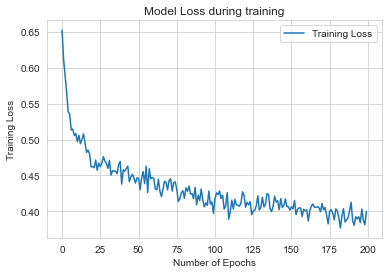

In [153]:
# Visualize the Model Loss
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.legend(['Training Loss'])

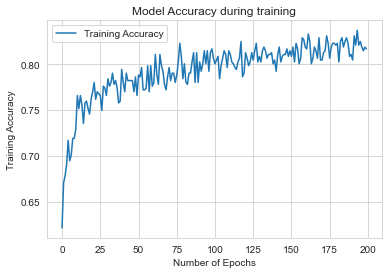

In [154]:
# Visualize the Model Accuracy
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model Accuracy during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.legend(['Training Accuracy'])

In [155]:
# Now we will predict from the test features

y_predictions = classifier.predict(X_test)

In [156]:
# So the target_predictions has probabilities, in order to use it in confusion matrix

y_predictions = (y_predictions > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Confusion Matrix')
print(confusion_matrix(y_test, y_predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(y_test, y_predictions))
print("\n")
print("Classification Report")
print(classification_report(y_test, y_predictions))

Confusion Matrix
[[89 11]
 [23 31]]


Accuracy Score
0.7792207792207793


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154

